In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib.colors import LinearSegmentedColormap


In [3]:
graph = {}
nodes = set()
edges = []
with open('linky.txt','r',) as file:
    for line in file:
        stanice = line.split(':  ')[1].strip('\n').split(';')
        linka =  line.split(':  ')[0]
        #print(linka)
        for i,stanica in enumerate(stanice[:-1]):
            
            nodes.add(stanica)
            edges.append((stanice[i-1],stanica))
            if i != 0:
                try:
                    graph[stanice[i-1]][stanica] += 1
                except KeyError:
                    try:
                        graph[stanice[i-1]][stanica] = 1
                    except KeyError:
                        graph[stanice[i-1]] = {}
                        graph[stanice[i-1]][stanica] = 1
n = len(nodes)
m = len(edges)
print(n,m)
G = nx.DiGraph()
for node in graph:
    for neigbour in graph[node]:
        G.add_edges_from([(node,neigbour)], weight = graph[node][neigbour])


564 2700


In [6]:
# Funkcia na získanie veľkosti najväčšej komponenty
def najvacsia_komponenta(graph):
    return len(max(nx.connected_components(graph), key=len))

# Pole pre ukladanie veľkostí najväčších komponent a podielov odstránených vrcholov
velkosti_komponent = []
podiely_funkcnych = []
G_un = G.to_undirected()
# Celkový počet vrcholov v grafe
pocet_vrcholov = len(G_un.nodes())

# Odstránenie vrcholov a zisťovanie veľkosti najväčšej komponenty a podielu odstránených vrcholov
while len(G_un.nodes()) > 0:
    velkosti_komponent.append(najvacsia_komponenta(G_un)/n)
    podiely_funkcnych.append( len(G_un.nodes()) / pocet_vrcholov)
    node_to_remove = list(G_un.nodes())[0]  # Môžete zvoliť vrchol podľa vášho výberu
    G_un.remove_node(node_to_remove)

# Výpis veľkostí najväčších komponent a podielov odstránených vrcholov po každom odstránení vrcholu
print("Veľkosti najväčších komponent a podiely odstránených vrcholov:")
for velkost, podiel in zip(velkosti_komponent, podiely_funkcnych):
    print("Veľkosť komponenty:", velkost, ", Podiel odstránených vrcholov:", podiel)

Veľkosti najväčších komponent a podiely odstránených vrcholov:
Veľkosť komponenty: 1.0 , Podiel odstránených vrcholov: 1.0
Veľkosť komponenty: 0.99822695035461 , Podiel odstránených vrcholov: 0.99822695035461
Veľkosť komponenty: 0.9964539007092199 , Podiel odstránených vrcholov: 0.9964539007092199
Veľkosť komponenty: 0.9946808510638298 , Podiel odstránených vrcholov: 0.9946808510638298
Veľkosť komponenty: 0.9929078014184397 , Podiel odstránených vrcholov: 0.9929078014184397
Veľkosť komponenty: 0.9911347517730497 , Podiel odstránených vrcholov: 0.9911347517730497
Veľkosť komponenty: 0.9893617021276596 , Podiel odstránených vrcholov: 0.9893617021276596
Veľkosť komponenty: 0.9875886524822695 , Podiel odstránených vrcholov: 0.9875886524822695
Veľkosť komponenty: 0.9858156028368794 , Podiel odstránených vrcholov: 0.9858156028368794
Veľkosť komponenty: 0.9822695035460993 , Podiel odstránených vrcholov: 0.9840425531914894
Veľkosť komponenty: 0.9787234042553191 , Podiel odstránených vrcholov: 

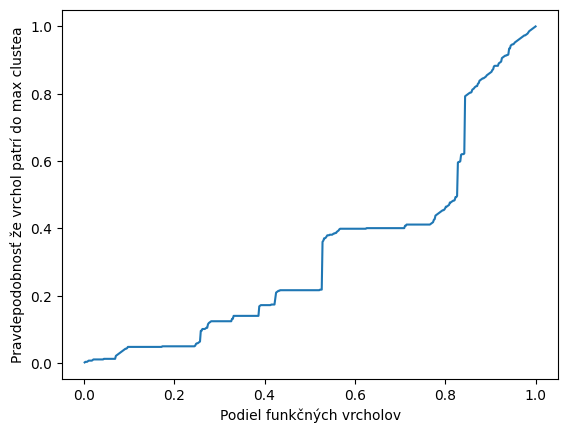

In [7]:
plt.plot( podiely_funkcnych, velkosti_komponent)
plt.xlabel("Podiel funkčných vrcholov")
plt.ylabel("Pravdepodobnosť že vrchol patrí do max clustea")
plt.show()